<a href="https://colab.research.google.com/github/lblum95/AML/blob/master/task2/jannik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline 

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
x_train = pd.read_csv("data/X_train.csv",index_col=0,header = 0)
y_train = pd.read_csv("data/y_train.csv",index_col=0,header = 0)
x_test = pd.read_csv("data/X_test.csv",index_col=0,header = 0)

In [4]:
x_train = x_train.loc[:,x_train.apply(pd.Series.nunique) != 1]
x_test = x_test.loc[:,x_test.apply(pd.Series.nunique) != 1]
print(x_train.shape)

(4800, 1000)


In [5]:
x_train.head(1)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x960,x961,x962,x963,x964,x965,x966,x967,x968,x969,x970,x971,x972,x973,x974,x975,x976,x977,x978,x979,x980,x981,x982,x983,x984,x985,x986,x987,x988,x989,x990,x991,x992,x993,x994,x995,x996,x997,x998,x999
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,-1.498973,1.448201,2.784979,1.905992,1.285007,-0.571679,1.253798,-2.590709,1.379211,-1.553323,-0.564972,2.584993,0.011699,0.441804,-0.69996,1.747325,2.065368,2.787858,2.013942,-1.401352,2.147372,0.61787,2.141796,-2.781471,0.413109,2.345852,0.030399,0.887061,-1.232804,0.109728,4.319156,3.178303,0.184391,-1.243393,1.406802,3.132227,-0.215465,1.505367,-0.503517,0.270487,...,1.34822,-1.877967,-0.739429,1.566261,2.73032,-2.380653,-2.652265,0.176041,2.00811,0.240972,0.710862,-1.695216,4.116688,0.84954,0.958647,0.514287,-2.362364,0.145864,0.874874,-1.650551,-0.709709,1.894579,2.585351,1.893157,-1.464831,4.246892,-4.139556,-2.965517,3.240977,1.190587,2.638401,-1.365574,2.856497,-1.916006,1.4069,-2.581604,0.839115,-0.004883,3.173465,2.179183


In [11]:
test=x_train.iloc[1]

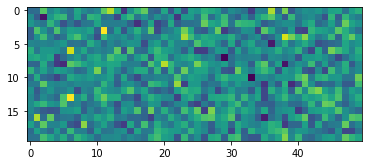

In [14]:
plt.imshow(np.array(test).reshape(20,50), interpolation='nearest')
plt.show()

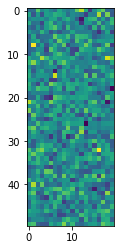

In [16]:
plt.imshow(np.array(test).reshape(50,20), interpolation='nearest')
plt.show()

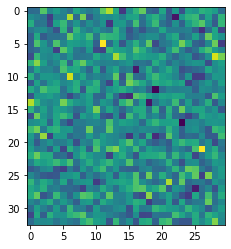

In [17]:
plt.imshow(np.array(test[:990]).reshape(33,30), interpolation='nearest')
plt.show()

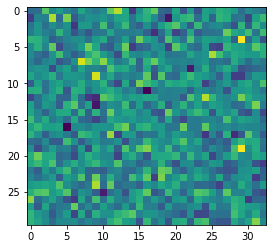

In [18]:
plt.imshow(np.array(test[:990]).reshape(30,33), interpolation='nearest')
plt.show()

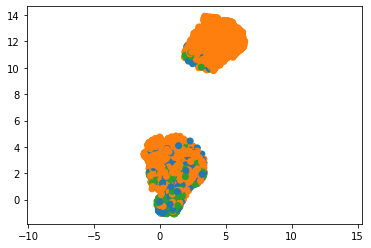

In [37]:
reducer = umap.UMAP()
data = x_train.values
embedding = reducer.fit_transform(data)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y_train['y']])
plt.gca().set_aspect('equal', 'datalim')
plt.show()

In [40]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape)

(4800, 1000)


In [58]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)
for amount in range(5,500,5):
  kbest = SelectKBest(f_classif,k=amount).fit(X_train,Y_train.values.ravel())
  X_best = kbest.transform(X_train)
  X_val = kbest.transform(X_test)
  parameters = {'kernel':('linear','rbf','sigmoid'), 'C':[0.1, 1, 10,100], 'class_weight':['balanced']} 
  svc = SVC()
  clf = GridSearchCV(svc, parameters)
  clf.fit(X_best,Y_train.values.ravel())
  BMAC = balanced_accuracy_score(Y_test.values.ravel(), clf.predict(X_val))
  print("Score:"+str(BMAC)+" Amount: "+str(amount))
  print(clf.best_params_)

Score:0.6160904889114462 Amount: 5
{'C': 10, 'class_weight': 'balanced', 'kernel': 'linear'}
Score:0.6088392355255762 Amount: 10
{'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}
Score:0.6013128091397116 Amount: 15
{'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}
Score:0.5699240714666435 Amount: 20
{'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}
Score:0.5678940274980854 Amount: 25
{'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}
Score:0.5427821960084481 Amount: 30
{'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}
Score:0.574069090394771 Amount: 35
{'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}
Score:0.570143362830651 Amount: 40
{'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}
Score:0.5798658579235271 Amount: 45
{'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}
Score:0.5716525649386678 Amount: 50
{'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}
Score:0.5879078961490675 Amount: 55
{'C': 100, 'class_weight': 'balanced', 'kerne